In [1]:
import pandas as pd

wine_df = pd.read_csv('./csv/wine.csv', encoding='CP949')

wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [2]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 203.2 KB


In [3]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# NaN값 확인
wine_df.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [5]:
# 컬럼명 확인
wine_df.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [6]:
# 컬럼명 변경
wine_df.rename(columns={
    'alcohol' : '도수', 
    'sugar' : '당도', 
    'pH' : '산도',
    'class' : '타겟'}, inplace=True)

wine_df.columns

Index(['도수', '당도', '산도', '타겟'], dtype='object')

### 피처와 레이블

In [7]:
# 레이블이 0 이면 레드 와인
# 레이블이 1 이면 화이트 와인
data = wine_df[['도수', '당도', '산도']]
target = wine_df['타겟']

print(data)
print(target)
print(target.value_counts())

        도수   당도    산도
0      9.4  1.9  3.51
1      9.8  2.6  3.20
2      9.8  2.3  3.26
3      9.8  1.9  3.16
4      9.4  1.9  3.51
...    ...  ...   ...
6492  11.2  1.6  3.27
6493   9.6  8.0  3.15
6494   9.4  1.2  2.99
6495  12.8  1.1  3.34
6496  11.8  0.8  3.26

[6497 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: 타겟, Length: 6497, dtype: int64
1    4898
0    1599
Name: 타겟, dtype: int64


### 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [9]:
# 데이터를 분리한 후에 출력을 하고, 인덱스가 잘 섞였나 확인.
print('X 테스트 데이터 : ')
print(X_test)
print('y 테스트 데이터 : ')
print(list(y_test))

X 테스트 데이터 : 
        도수     당도    산도
3103  12.2  12.80  3.26
1419   9.9   2.20  3.27
4761  12.0   7.40  3.18
4690   9.5  11.20  3.12
4032   8.9  13.90  3.11
...    ...    ...   ...
4294  11.3   9.65  3.28
3757  10.6   1.30  3.52
5954  12.7   2.50  3.22
4418  11.4   2.00  3.44
6182   9.3   7.90  2.86

[1950 rows x 3 columns]
y 테스트 데이터 : 
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [10]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))
print('학습 세트 Shape:%s, 테스트 세트 Shape:%s'%(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4547, 3), 테스트 세트 Shape:(1950, 3)
학습 세트 Shape:(4547, 3), 테스트 세트 Shape:(1950, 3)
학습 세트 레이블 값 분포 비율
1    0.758742
0    0.241258
Name: 타겟, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.742564
0    0.257436
Name: 타겟, dtype: float64


### 머신러닝 분류 모델

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, recall_score, precision_score

import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
gb_clf = GradientBoostingClassifier(random_state=42)
lgb_clf = LGBMClassifier(random_state=42)
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
knn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()

### 모델별 학습/예측/평가

In [12]:
# LogisticRegression 학습/예측/평가
lr_clf_time = time.time()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_clf_time))

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print('\nDecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTree 수행 시간: {0:.1f} 초'.format(time.time()-dt_clf_time))

# RandomForestClassifier 학습/예측/평가
rf_clf_time = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForest 수행 시간: {0:.1f} 초'.format(time.time()-rf_clf_time))

# GBM 학습/예측/평가
gb_clf_time = time.time()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('\nGBM 정확도: {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('GBM roc_auc: {:0.3f}'.format(roc_auc_score(y_test, gb_pred)))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-gb_clf_time))

# LGBM 학습/예측/평가
lgb_clf_time = time.time()
lgb_clf.fit(X_train, y_train)
lgb_pred = lgb_clf.predict(X_test)

print('\nLGBM 정확도: {0:.4f}'.format(accuracy_score(y_test, lgb_pred)))
print('LGBM roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lgb_pred)))
print('LGBM 수행 시간: {0:.1f} 초'.format(time.time()-lgb_clf_time))

# XGBClassifier 학습/예측/평가
xgb_wrapper_time = time.time()
xgb_wrapper.fit(X_train, y_train)
xgb_pred = xgb_wrapper.predict(X_test)

print('\nXGBC 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
print('XGBC roc_auc: {:0.3f}'.format(roc_auc_score(y_test, xgb_pred)))
print('XGBC 수행 시간: {0:.1f} 초'.format(time.time()-xgb_wrapper_time))

# KNN 학습/예측/평가
knn_clf_time = time.time()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

print('\nKNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN roc_auc: {:0.3f}'.format(roc_auc_score(y_test, knn_pred)))
print('KNN 수행 시간: {0:.1f} 초'.format(time.time()-knn_clf_time))

# GNB 학습/예측/평가
gnb_clf_time = time.time()
gnb_clf.fit(X_train, y_train)
gnb_pred = gnb_clf.predict(X_test)

print('\nGNB 정확도: {0:.4f}'.format(accuracy_score(y_test, gnb_pred)))
print('GNB roc_auc: {:0.3f}'.format(roc_auc_score(y_test, gnb_pred)))
print('GNB 수행 시간: {0:.1f} 초'.format(time.time()-gnb_clf_time))

LogisticRegression 정확도: 0.7723
LogisticRegression roc_auc: 0.635
LogisticRegression 수행 시간: 0.1 초

DecisionTreeClassifier 정확도: 0.8600
DecisionTreeClassifier roc_auc: 0.819
DecisionTree 수행 시간: 0.1 초

RandomForestClassifier 정확도: 0.8851
RandomForestClassifier roc_auc: 0.851
RandomForest 수행 시간: 1.1 초

GBM 정확도: 0.8564
GBM roc_auc: 0.808
GBM 수행 시간: 1.2 초

LGBM 정확도: 0.8626
LGBM roc_auc: 0.829
LGBM 수행 시간: 1.3 초

XGBC 정확도: 0.8621
XGBC roc_auc: 0.823
XGBC 수행 시간: 2.8 초

KNN 정확도: 0.8549
KNN roc_auc: 0.806
KNN 수행 시간: 0.2 초

GNB 정확도: 0.7815
GNB roc_auc: 0.779
GNB 수행 시간: 0.0 초


## 검증 데이터 분리 및 최적 하이퍼 파라미터 탐색

### KFold

In [13]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):  # enumerate : 인덱스 출력
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count+1, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [14]:
# Logisticregression KFold
exec_kfold(lr_clf, folds=5)

교차 검증 1 정확도: 0.0062
교차 검증 2 정확도: 0.7900
교차 검증 3 정확도: 0.8022
교차 검증 4 정확도: 0.8938
교차 검증 5 정확도: 0.9338
평균 정확도: 0.6852


In [15]:
# DecisionTree KFold
exec_kfold(dt_clf, folds=5)

교차 검증 1 정확도: 0.2608
교차 검증 2 정확도: 0.8077
교차 검증 3 정확도: 0.8283
교차 검증 4 정확도: 0.8368
교차 검증 5 정확도: 0.8830
평균 정확도: 0.7233


In [16]:
# RandomForest KFold
exec_kfold(rf_clf, folds=5)

교차 검증 1 정확도: 0.2492
교차 검증 2 정확도: 0.8546
교차 검증 3 정확도: 0.8737
교차 검증 4 정확도: 0.8999
교차 검증 5 정확도: 0.9230
평균 정확도: 0.7601


In [17]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
n_iter=0
cv_accuracy=[]

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data, target):
    n_iter += 1
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

학습 레이블 데이터 분포:
 1    4898
0     299
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 0    1300
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3897
0    1300
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1001
0     299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64


In [18]:
# DecisionTree KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # DecisionTree 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.2608, 학습 데이터 크기: 5197, 검증데이터 크기: 1300
#1 검증 세트 인덱스:[   0    1    2 ... 1297 1298 1299]
학습 레이블 데이터 분포:
 1    4898
0     299
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 0    1300
Name: 타겟, dtype: int64

#2 교차 검증 정확도 :0.8077, 학습 데이터 크기: 5197, 검증데이터 크기: 1300
#2 검증 세트 인덱스:[1300 1301 1302 ... 2597 2598 2599]
학습 레이블 데이터 분포:
 1    3897
0    1300
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1001
0     299
Name: 타겟, dtype: int64

#3 교차 검증 정확도 :0.8283, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#3 검증 세트 인덱스:[2600 2601 2602 ... 3896 3897 3898]
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64

#4 교차 검증 정확도 :0.8368, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#4 검증 세트 인덱스:[3899 3900 3901 ... 5195 5196 5197]
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64

#5 교차 검증 정확도 :0.883, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#5 검증 세트 인덱스:[5198 5199 5200 ... 6494 6495 6496]
학습 레이블 데이터 분포:
 1    3599
0    1599
Nam

### KFold의 문제점
- 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못한다.

### StratifiedKFold
- 회귀인 경우는 StratifiedKFold로 분할할 수 없으므로 K 폴드를 사용해야한다.

In [19]:
from sklearn.model_selection import StratifiedKFold

def exec_skfold(clf, folds=3):
    # 폴드 세트를 5개인 KFold객체 생성
    skfold = StratifiedKFold(n_splits=folds)
    scores = []
    
    # SKFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(skfold.split(data, target)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count+1, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [20]:
exec_skfold(lr_clf, folds=5)

교차 검증 1 정확도: 0.7915
교차 검증 2 정확도: 0.7146
교차 검증 3 정확도: 0.7791
교차 검증 4 정확도: 0.7752
교차 검증 5 정확도: 0.8183
평균 정확도: 0.7757


In [21]:
exec_skfold(dt_clf, folds=5)

교차 검증 1 정확도: 0.8300
교차 검증 2 정확도: 0.7854
교차 검증 3 정확도: 0.7968
교차 검증 4 정확도: 0.8075
교차 검증 5 정확도: 0.8329
평균 정확도: 0.8105


In [22]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in skfold.split(data, target):
    n_iter += 1
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# KFold 에서는 학습 레이블과 검증 레이블 값의 분포도가 불균형했지만, StratifiedKFold를 통해 분포도가 동일하게 할당됐다.

학습 레이블 데이터 분포:
 1    3265
0    1066
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1633
0     533
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3265
0    1066
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1633
0     533
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3266
0    1066
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1632
0     533
Name: 타겟, dtype: int64


In [23]:
# DecisionTree StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :0.9985, 학습 데이터 크기: 4332, 검증 데이터 크기: 1300
#1 검증 세트 인덱스:[   0    1    2 ... 2576 2577 2578]

2 교차 검증 정확도 :0.9992, 학습 데이터 크기: 4332, 검증 데이터 크기: 1300
#2 검증 세트 인덱스:[ 320  321  322 ... 3556 3557 3558]

3 교차 검증 정확도 :0.9946, 학습 데이터 크기: 4332, 검증 데이터 크기: 1299
#3 검증 세트 인덱스:[ 640  641  642 ... 4535 4536 4537]

4 교차 검증 정확도 :0.8668, 학습 데이터 크기: 4332, 검증 데이터 크기: 1299
#4 검증 세트 인덱스:[ 960  961  962 ... 5514 5515 5516]

5 교차 검증 정확도 :0.8299, 학습 데이터 크기: 4332, 검증 데이터 크기: 1299
#5 검증 세트 인덱스:[1280 1281 1282 ... 6494 6495 6496]

## 교차 검증별 정확도: [0.9985 0.9992 0.9946 0.8668 0.8299]
## 평균 검증 정확도: 0.9378


### cross_val_score()

In [24]:
from sklearn.model_selection import cross_val_score

# LogisticRegression cross_val_score
scores = cross_val_score(lr_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count+1, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 1 정확도: 0.7915
교차 검증 2 정확도: 0.7146
교차 검증 3 정확도: 0.7791
교차 검증 4 정확도: 0.7752
교차 검증 5 정확도: 0.8183
평균 정확도: 0.7757


### GridSearch CV
- 교차 검증과 최적 하이퍼 파라미터 튜닝 한번에 가능

## 성능평가

### 정확도
- 실제 데이터에서 예측 데이터가 얼마나 같은지
### 오차행렬
- 분류 모델이 얼마나 헷갈리고 있는지
- TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
- FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
- FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
- TP : 환자를 암이 맞다고 예측했고 실제로도 암이 맞음
### 정밀도 
- True라고 예측한 것중 실제 True인 비율
- FN을 낮추는데 초점
### 재현율 
- 실제 True인 것 중에서 True라고 예측한 것의 비율
- 민감도(Sensitivity) or TPR(True Positive Rate)
- FP를 낮추는데 초점
### F1-Score
- 정밀도와 재현율의 조화평균
### ROC-curve, AUC
- TPR과 FPR 그래프
    - 민감도(Sensitivity, TPR, Recall)
    - 환자를 암이 맞다고 예측했는데 실제로도 암인 비율
- 특이도(Specificity, TNR)
    - 환자를 암이 아니라고 예측했는데 실제로도 암이 아닌 비율

- 부실기업을 예측하려고 하는데 정상기업이 0, 부실기업이 1이라 가정해봅시다.
- 정밀도와 재현율 중 어느 것이 더 중요할까?

### LogisticRegression GridSearchCV

In [25]:
# LogisticRegression GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\
            'C':[1, 5, 10, 15],\
            # 'C':[9],\
            # 'solver':['lbfgs', 'liblinear']
            }

def best_lrparam(clf, param, scoring_name, cv_num):
    b_params= []
    
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
    grid_cv.fit(X_train, y_train)
    
    b_params.append(grid_cv.best_params_)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('\nGridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
    
    return b_params

In [26]:
b_params = best_lrparam(lr_clf, parameters, 'accuracy', 5)
b_params[-1]

GridSearchCV 최적 하이퍼 파라미터 : {'C': 10, 'penalty': 'l2'}

GridSearchCV 최고 정확도 :0.7606
테스트 세트에서의 LogisticRegression 정확도 : 0.7983


{'C': 10, 'penalty': 'l2'}

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {
            'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\
            'C':[0.01, 0.1, 1, 5, 10],\
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(lr_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
print('LogisticRegression GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 10, 'penalty': 'l2'}

GridSearchCV 최고 정확도 : 0.7606
테스트 세트에서의 LogisticRegression 정확도 : 0.7983
LogisticRegression GridSearchCV 수행 시간: 2.6 초


In [28]:
# 최적 하이퍼 파라미터 적용
lr_clf1 = LogisticRegression(C=10, penalty='l2')
lr_clf1.fit(X_train, y_train)
lr1_pred = lr_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, lr1_pred)))

최적화 후 예측 정확도: 0.7983


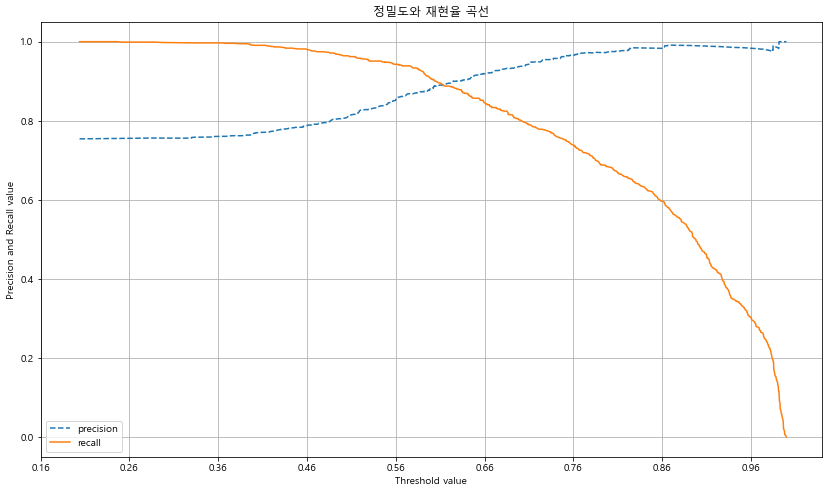

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lr_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [31]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8948


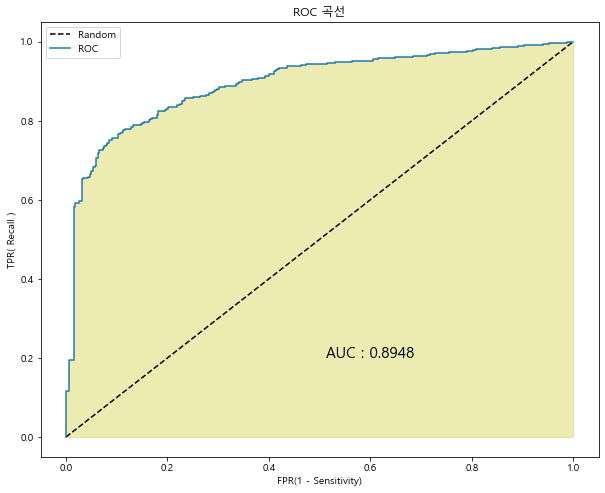

In [32]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

In [33]:
confusion = confusion_matrix(y_test, lr1_pred)
accuracy = accuracy_score(y_test, lr1_pred)
precision = precision_score(y_test, lr1_pred)
recall = recall_score(y_test, lr1_pred)
f1 = f1_score(y_test, lr1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[ 92 227]
 [ 35 945]]
정확도: 0.7983, 정밀도: 0.8063, 재현율: 0.9643, F1:0.8783, AUC:0.8948


In [34]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return accuracy, precision, recall, f1, roc_auc

In [35]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, lr_clf1.predict_proba(X_test)[:, 1])

In [36]:
from sklearn.preprocessing import Binarizer

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
pred_proba = lr_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.2
오차행렬
[[  0 319]
 [  0 980]]
정확도: 0.7544, 정밀도: 0.7544, 재현율: 1.0000, F1:0.8600, AUC:0.8948
임곗값: 0.3
오차행렬
[[  4 315]
 [  3 977]]
정확도: 0.7552, 정밀도: 0.7562, 재현율: 0.9969, F1:0.8600, AUC:0.8948
임곗값: 0.4
오차행렬
[[ 27 292]
 [  9 971]]
정확도: 0.7683, 정밀도: 0.7688, 재현율: 0.9908, F1:0.8658, AUC:0.8948
임곗값: 0.5
오차행렬
[[ 92 227]
 [ 35 945]]
정확도: 0.7983, 정밀도: 0.8063, 재현율: 0.9643, F1:0.8783, AUC:0.8948
임곗값: 0.6
오차행렬
[[198 121]
 [ 93 887]]
정확도: 0.8353, 정밀도: 0.8800, 재현율: 0.9051, F1:0.8924, AUC:0.8948


### 최적 임곗값 적용

In [37]:
binarizer = Binarizer(threshold=0.6)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, lr_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[198 121]
 [ 93 887]]
정확도: 0.8353, 정밀도: 0.8800, 재현율: 0.9051, F1:0.8924, AUC:0.8948


(0.8352578906851424,
 0.8799603174603174,
 0.9051020408163265,
 0.892354124748491,
 0.8948179898918815)

### DecisionTree GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'max_depth':[4, 5, 6, 8, 10],\
                'min_samples_leaf':[2, 4, 6],\
                'min_samples_split':[2, 4, 6]
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

GridSearchCV 최고 정확도 : 0.8483
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8699
DecisionTreeClassifier GridSearchCV 수행 시간: 4.5 초


In [40]:
# 최적 하이퍼 파라미터 적용
dt_clf1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=2)
dt_clf1.fit(X_train, y_train)
dt1_pred = dt_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, dt1_pred)))

최적화 후 예측 정확도: 0.8699


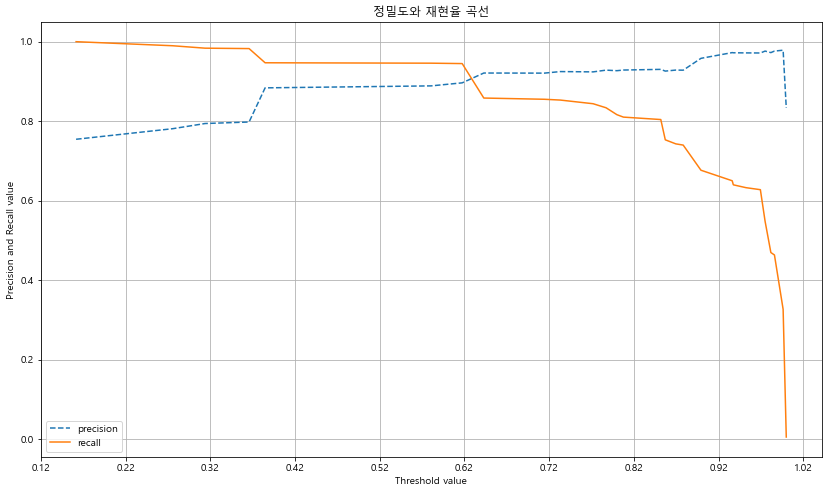

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, dt_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

- 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
- 임계값이 클수록 재현율은 낮고, 정밀도는 높다.
- 재현율이 높으면 정밀도가 낮고
- 정밀도가 높으면 재현율이 낮다.
- -> 정밀도와 재현율 trade-off

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = dt_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]
샘플 index로 추출한 임곗값:  [1.   1.   0.99 0.98 0.98 0.97 0.95 0.94 0.94 0.9  0.88 0.87 0.86 0.85
 0.8  0.79 0.77 0.73 0.71 0.64 0.62 0.58 0.38 0.37 0.31 0.28 0.16]
샘플 임곗값별 FPR:  [0.003 0.022 0.034 0.041 0.041 0.056 0.056 0.056 0.056 0.091 0.176 0.176
 0.185 0.185 0.197 0.197 0.213 0.213 0.226 0.226 0.335 0.364 0.382 0.765
 0.784 0.853 1.   ]
샘플 임곗값별 TPR:  [0.005 0.327 0.463 0.469 0.548 0.628 0.633 0.64  0.65  0.677 0.74  0.743
 0.753 0.804 0.816 0.834 0.844 0.853 0.855 0.858 0.945 0.946 0.947 0.983
 0.984 0.99  1.   ]


### 오차행렬
- TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
- FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
- FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
- TP : 환자를 암이 맞다고 예측했고 실제로도 암이 맞음

In [ ]:
confusion = confusion_matrix(y_test, dt1_pred)
accuracy = accuracy_score(y_test, dt1_pred)
precision = precision_score(y_test, dt1_pred)
recall = recall_score(y_test, dt1_pred)
f1 = f1_score(y_test, dt1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.8896


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.preprocessing import Binarizer

thresholds = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65]
pred_proba = dt_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.15
오차행렬
[[  0 319]
 [  0 980]]
정확도: 0.7544, 정밀도: 0.7544, 재현율: 1.0000, F1:0.8600, AUC:0.8896
임곗값: 0.25
오차행렬
[[ 47 272]
 [ 10 970]]
정확도: 0.7829, 정밀도: 0.7810, 재현율: 0.9898, F1:0.8731, AUC:0.8896
임곗값: 0.35
오차행렬
[[ 75 244]
 [ 17 963]]
정확도: 0.7991, 정밀도: 0.7978, 재현율: 0.9827, F1:0.8807, AUC:0.8896
임곗값: 0.45
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.8896
임곗값: 0.55
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.8896
임곗값: 0.65
오차행렬
[[247  72]
 [142 838]]
정확도: 0.8353, 정밀도: 0.9209, 재현율: 0.8551, F1:0.8868, AUC:0.8896


## ------------11.14-------------

### 최적 임곗값 적용

In [ ]:
binarizer = Binarizer(threshold=0.4)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[ 298  204]
 [  94 1354]]
정확도: 0.8472, 정밀도: 0.8691, 재현율: 0.9351, F1:0.9009, AUC:0.9115


(0.8471794871794872,
 0.8690629011553274,
 0.9350828729281768,
 0.9008649367930807,
 0.9115203550439128)

### 피처중요도

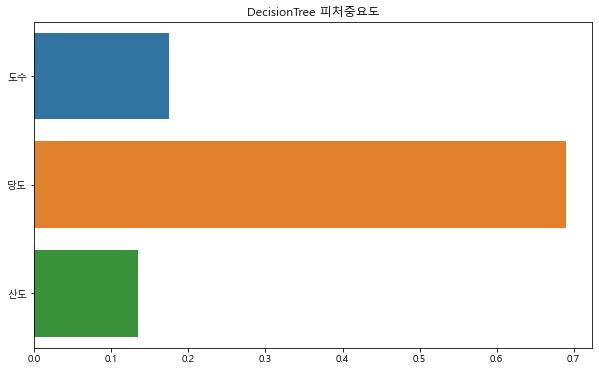

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches((10,6))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

plt.show()

### 시각화

In [ ]:
from sklearn.tree import export_graphviz

feature_names = wine_df.iloc[:, :-1].columns.tolist()
target_names = ["0", "1"]

export_graphviz(dt_clf1, 
                out_file="./image/wine_dtree.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

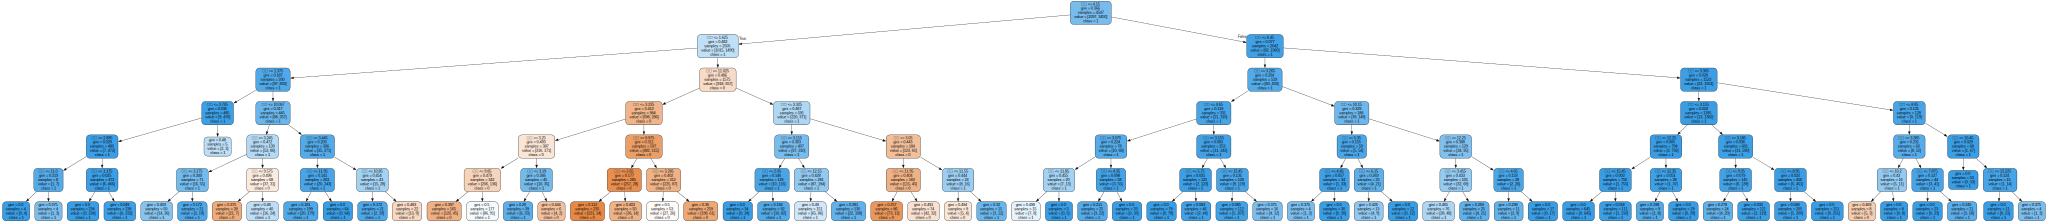

In [ ]:
import graphviz

with open("./image/wine_dtree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### RandomForest GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators':[100, 300],\
                'max_depth':[4, 5, 6],\
                'min_samples_split':[2, 4, 6],\
                'min_samples_leaf':[4, 6, 8]
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 RandomForest 정확도 : {0:.4f}'.format(accuracy))
print('RandomForest GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}

GridSearchCV 최고 정확도 : 0.8435
테스트 세트에서의 RandomForest 정확도 : 0.8884
RandomForest GridSearchCV 수행 시간: 216.5 초


In [43]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=2, n_estimators=100)
rf_clf1.fit(X_train, y_train)
rf1_pred = rf_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, rf1_pred)))

최적화 후 예측 정확도: 0.8922


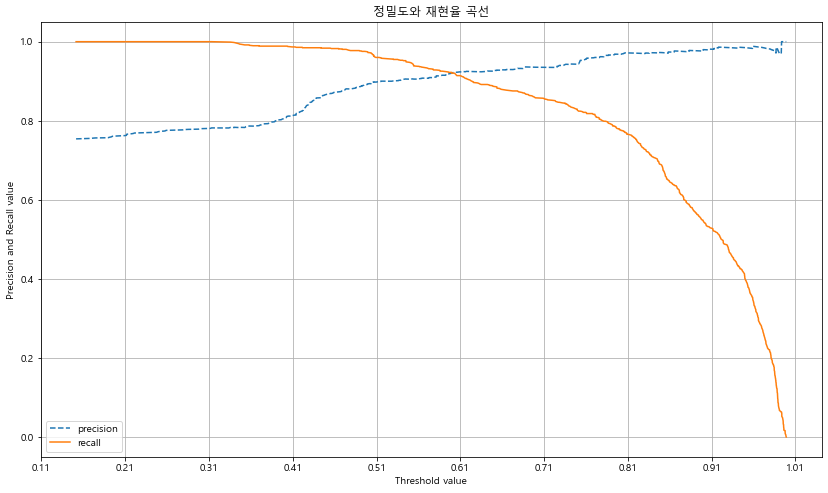

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [45]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

### 오차행렬

In [48]:
confusion = confusion_matrix(y_test, rf1_pred)
accuracy = accuracy_score(y_test, rf1_pred)
precision = precision_score(y_test, rf1_pred)
recall = recall_score(y_test, rf1_pred)
f1 = f1_score(y_test, rf1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[206 113]
 [ 27 953]]
정확도: 0.8922, 정밀도: 0.8940, 재현율: 0.9724, F1:0.9316, AUC:0.9234


In [49]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

In [51]:
from sklearn.preprocessing import Binarizer

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
pred_proba = dt_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.2
오차행렬
[[ 47 272]
 [ 10 970]]
정확도: 0.7829, 정밀도: 0.7810, 재현율: 0.9898, F1:0.8731, AUC:0.9234
임곗값: 0.3
오차행렬
[[ 69 250]
 [ 16 964]]
정확도: 0.7952, 정밀도: 0.7941, 재현율: 0.9837, F1:0.8788, AUC:0.9234
임곗값: 0.4
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.9234
임곗값: 0.5
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.9234
임곗값: 0.6
오차행렬
[[212 107]
 [ 54 926]]
정확도: 0.8761, 정밀도: 0.8964, 재현율: 0.9449, F1:0.9200, AUC:0.9234


### 최적 임곗값 적용

In [52]:
binarizer = Binarizer(threshold=0.6)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[242  77]
 [ 78 902]]
정확도: 0.8807, 정밀도: 0.9213, 재현율: 0.9204, F1:0.9209, AUC:0.9234


(0.8806774441878368,
 0.9213483146067416,
 0.9204081632653062,
 0.920877998979071,
 0.9233654276757726)

### 피처중요도

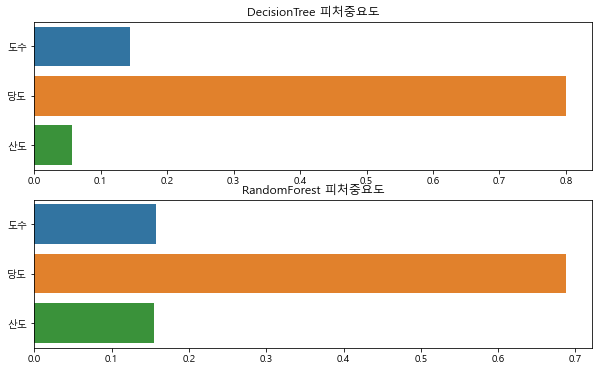

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((10, 6))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

### 시각화

In [63]:
data_names = ['도수', '당도', '산도']
target_names = ['white wine', 'red wine']

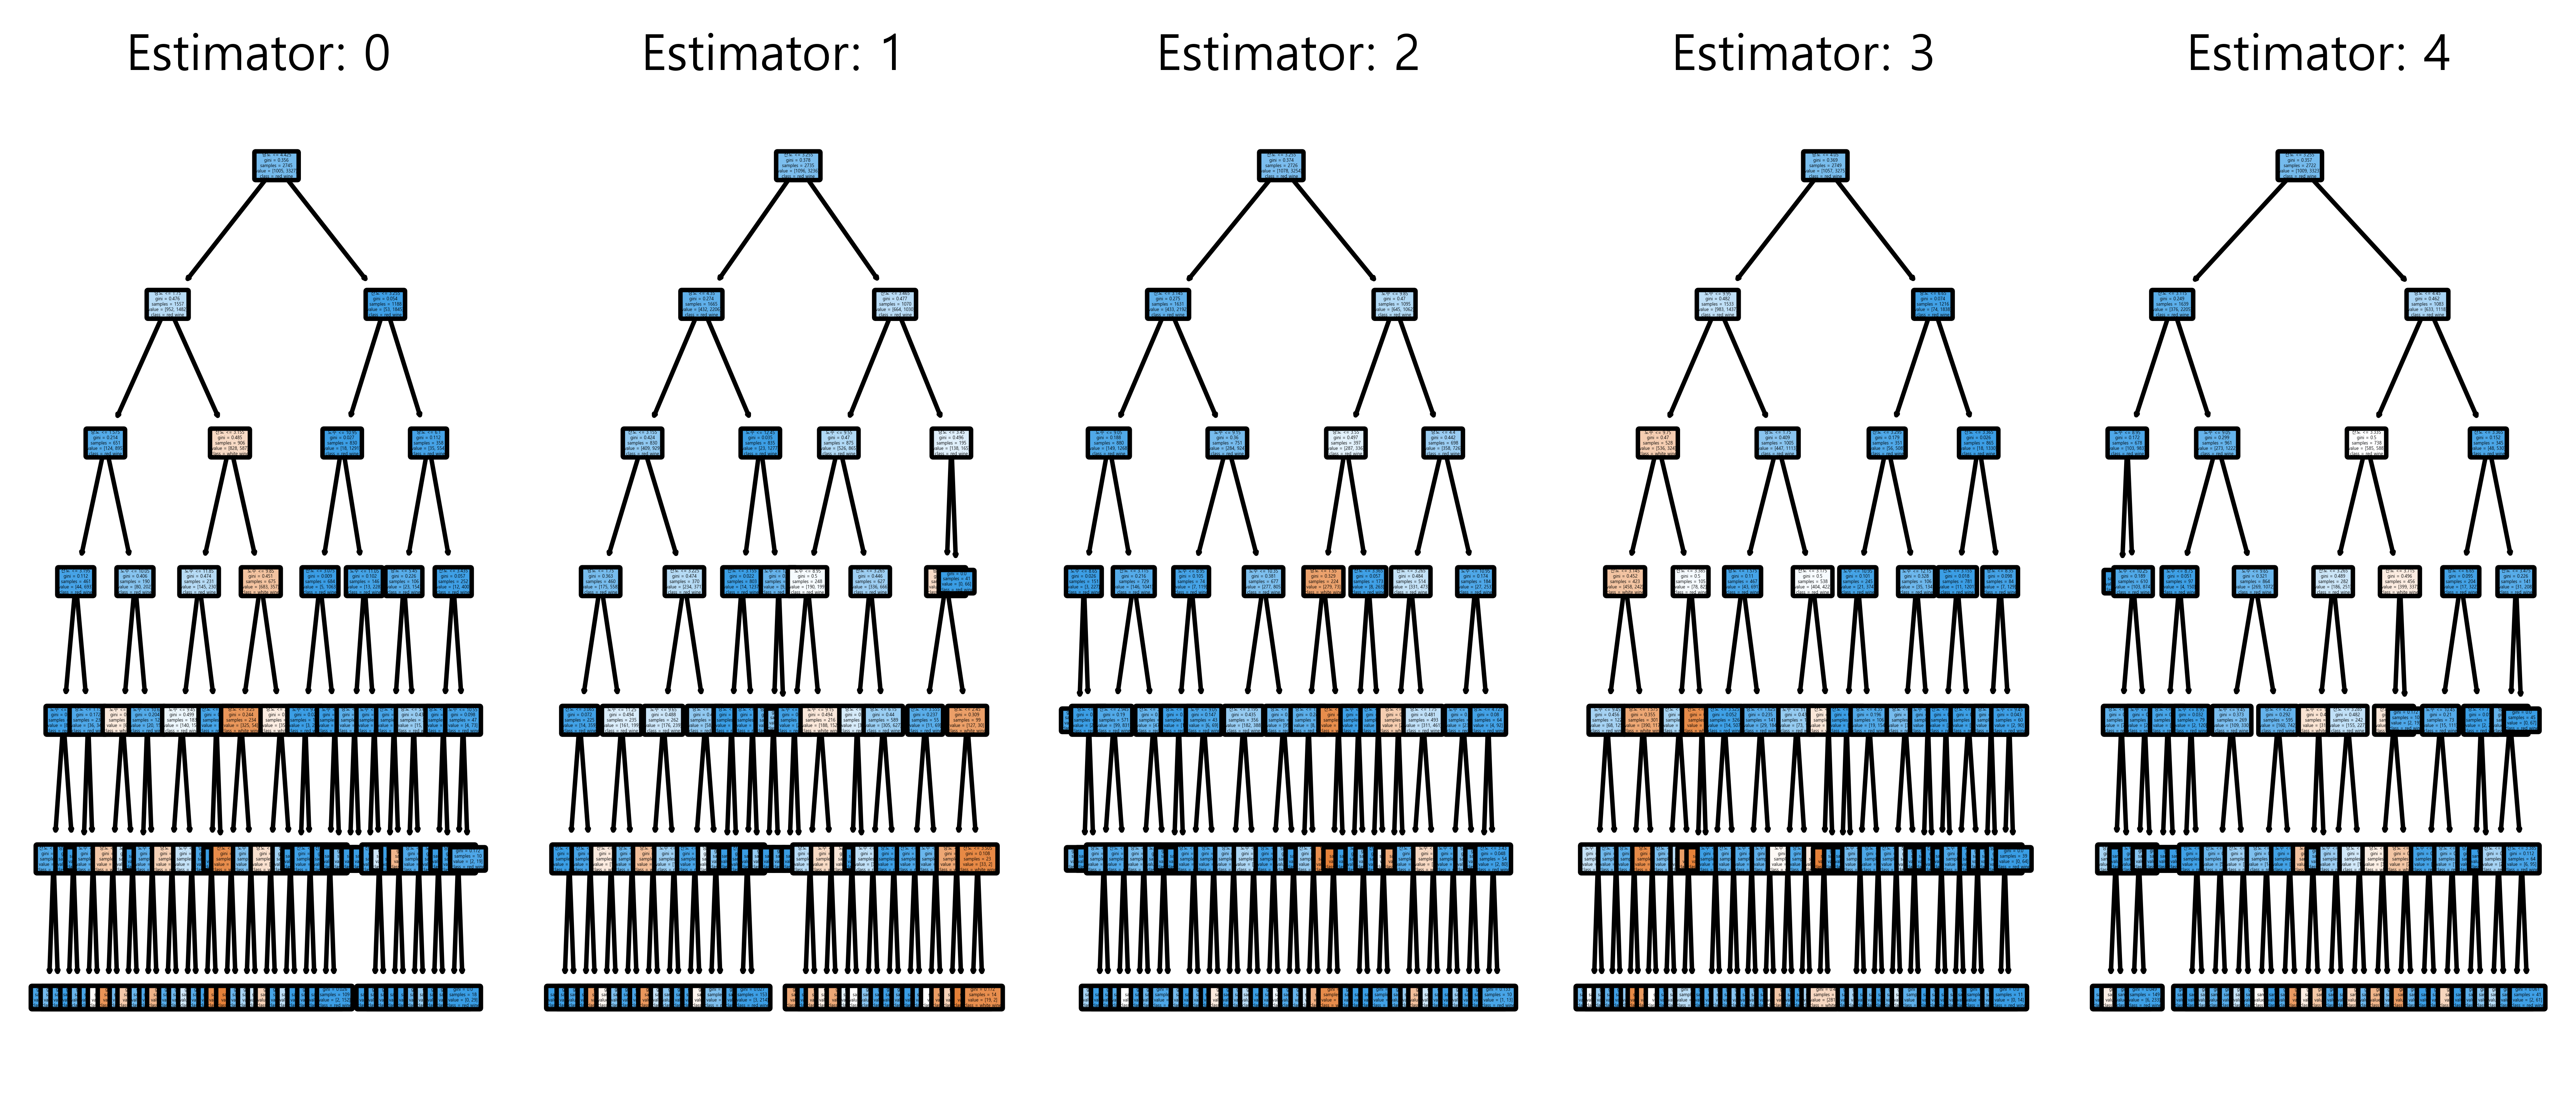

In [67]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 4), dpi=900)

for index in range(0, 5):
    tree.plot_tree(rf_clf1.estimators_[index],
                   feature_names = data_names, 
                   class_names=target_names,
                   impurity=True,
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

### GBM GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators':[100, 300],\
                'max_depth':[4, 5, 6],\
                'min_samples_split':[2, 4, 6],\
                'min_samples_leaf':[4, 6, 8]
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(gb_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 GBM 정확도 : {0:.4f}'.format(accuracy))
print('GBM GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

GridSearchCV 최고 정확도 : 0.8532
테스트 세트에서의 GBM 정확도 : 0.8699
GBM GridSearchCV 수행 시간: 390.3 초


In [76]:
# 최적 하이퍼 파라미터 적용
gb_clf1 = RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100)
gb_clf1.fit(X_train, y_train)
gb1_pred = gb_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, gb1_pred)))

최적화 후 예측 정확도: 0.8668


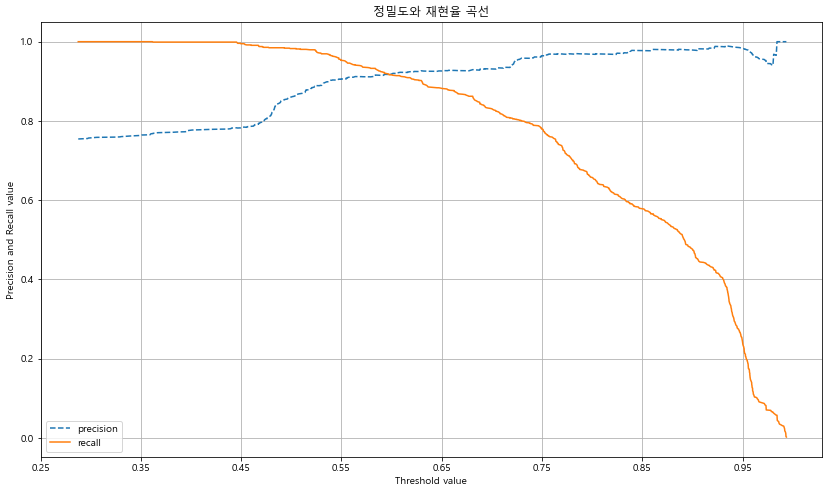

In [77]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, gb_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [78]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

### 오차행렬

In [79]:
confusion = confusion_matrix(y_test, gb1_pred)
accuracy = accuracy_score(y_test, gb1_pred)
precision = precision_score(y_test, gb1_pred)
recall = recall_score(y_test, gb1_pred)
f1 = f1_score(y_test, gb1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[163 156]
 [ 17 963]]
정확도: 0.8668, 정밀도: 0.8606, 재현율: 0.9827, F1:0.9176, AUC:0.9178


In [80]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, gb_clf1.predict_proba(X_test)[:, 1])

In [81]:
from sklearn.preprocessing import Binarizer

thresholds = [0.3, 0.4, 0.5, 0.6]
pred_proba = dt_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차행렬
[[ 69 250]
 [ 16 964]]
정확도: 0.7952, 정밀도: 0.7941, 재현율: 0.9837, F1:0.8788, AUC:0.9178
임곗값: 0.4
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.9178
임곗값: 0.5
오차행렬
[[203 116]
 [ 53 927]]
정확도: 0.8699, 정밀도: 0.8888, 재현율: 0.9459, F1:0.9165, AUC:0.9178
임곗값: 0.6
오차행렬
[[212 107]
 [ 54 926]]
정확도: 0.8761, 정밀도: 0.8964, 재현율: 0.9449, F1:0.9200, AUC:0.9178


### 최적 임곗값 적용

In [82]:
binarizer = Binarizer(threshold=0.6)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, gb_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[240  79]
 [ 82 898]]
정확도: 0.8761, 정밀도: 0.9191, 재현율: 0.9163, F1:0.9177, AUC:0.9178


(0.876058506543495,
 0.9191402251791198,
 0.9163265306122449,
 0.917731221257026,
 0.9178411489987844)

### 피처중요도

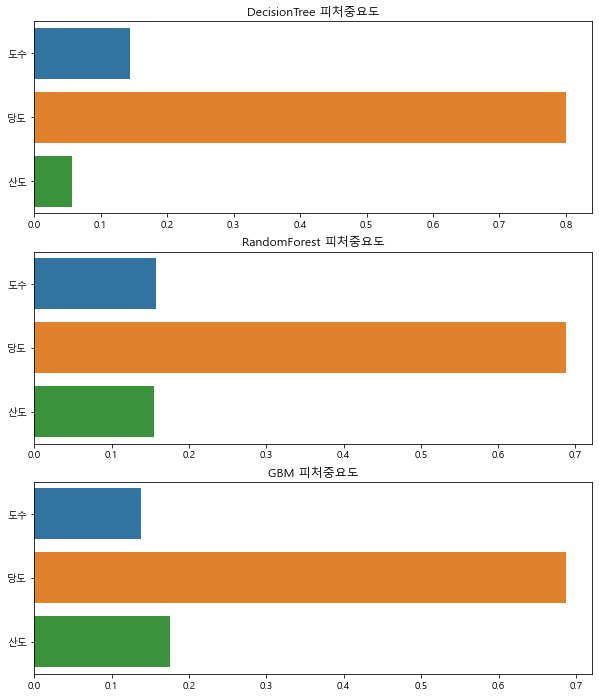

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(3, 1, squeeze=False)
fig.set_size_inches((10, 12))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf1.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

plt.show()

### LGBM GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators':[100, 300],\
                'max_depth':[4, 5, 6],\
                'min_child_samples':[20, 30, 40]
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(lgb_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 LGBM 정확도 : {0:.4f}'.format(accuracy))
print('LGBM GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'min_child_samples': 40, 'n_estimators': 100}

GridSearchCV 최고 정확도 : 0.8518
테스트 세트에서의 LGBM 정확도 : 0.8730
LGBM GridSearchCV 수행 시간: 22.4 초


In [90]:
# 최적 하이퍼 파라미터 적용
lgb_clf1 = LGBMClassifier(max_depth=4, min_child_samples=40, n_estimators=100)
lgb_clf1.fit(X_train, y_train)
lgb1_pred = lgb_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, lgb1_pred)))

최적화 후 예측 정확도: 0.8730


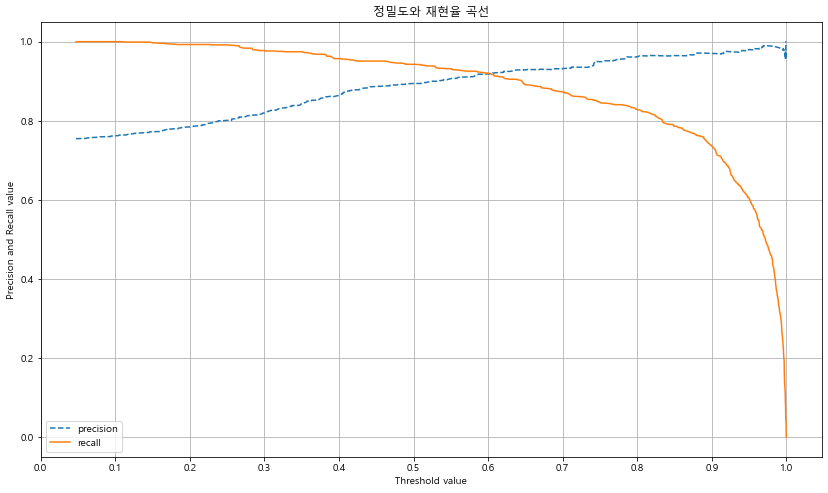

In [91]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [92]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lgb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

### 오차행렬

In [93]:
confusion = confusion_matrix(y_test, lgb1_pred)
accuracy = accuracy_score(y_test, lgb1_pred)
precision = precision_score(y_test, lgb1_pred)
recall = recall_score(y_test, lgb1_pred)
f1 = f1_score(y_test, lgb1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[210 109]
 [ 56 924]]
정확도: 0.8730, 정밀도: 0.8945, 재현율: 0.9429, F1:0.9180, AUC:0.9188


In [ ]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, lgb_clf1.predict_proba(X_test)[:, 1])

In [94]:
from sklearn.preprocessing import Binarizer

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
pred_proba = lgb_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.1
오차행렬
[[ 14 305]
 [  0 980]]
정확도: 0.7652, 정밀도: 0.7626, 재현율: 1.0000, F1:0.8653, AUC:0.9178
임곗값: 0.2
오차행렬
[[ 52 267]
 [  7 973]]
정확도: 0.7891, 정밀도: 0.7847, 재현율: 0.9929, F1:0.8766, AUC:0.9178
임곗값: 0.3
오차행렬
[[109 210]
 [ 22 958]]
정확도: 0.8214, 정밀도: 0.8202, 재현율: 0.9776, F1:0.8920, AUC:0.9178
임곗값: 0.4
오차행렬
[[173 146]
 [ 42 938]]
정확도: 0.8553, 정밀도: 0.8653, 재현율: 0.9571, F1:0.9089, AUC:0.9178
임곗값: 0.5
오차행렬
[[210 109]
 [ 56 924]]
정확도: 0.8730, 정밀도: 0.8945, 재현율: 0.9429, F1:0.9180, AUC:0.9178
임곗값: 0.6
오차행렬
[[239  80]
 [ 78 902]]
정확도: 0.8784, 정밀도: 0.9185, 재현율: 0.9204, F1:0.9195, AUC:0.9178


### 최적 임곗값 적용

In [95]:
binarizer = Binarizer(threshold=0.6)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, lgb_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[239  80]
 [ 78 902]]
정확도: 0.8784, 정밀도: 0.9185, 재현율: 0.9204, F1:0.9195, AUC:0.9188


(0.8783679753656659,
 0.9185336048879837,
 0.9204081632653062,
 0.9194699286442405,
 0.9187591964685562)

### 피처중요도

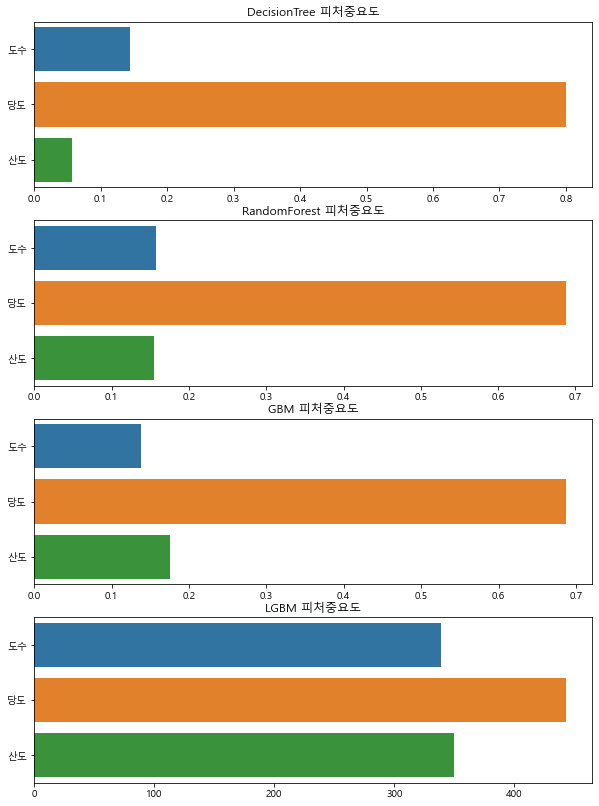

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((10, 14))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf1.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=lgb_clf1.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("LGBM 피처중요도")

plt.show()

### LGBM GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_estimators':[100, 300],\
                'max_depth':[4, 5, 6],\
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(xgb_wrapper, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 XGB 정확도 : {0:.4f}'.format(accuracy))
print('XGB GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'n_estimators': 100}

GridSearchCV 최고 정확도 : 0.8520
테스트 세트에서의 XGB 정확도 : 0.8684
XGB GridSearchCV 수행 시간: 47.6 초


In [99]:
# 최적 하이퍼 파라미터 적용
xgb_clf1 = XGBClassifier(max_depth=4, n_estimators=100)
xgb_clf1.fit(X_train, y_train)
xgb1_pred = xgb_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb1_pred)))

최적화 후 예측 정확도: 0.8607


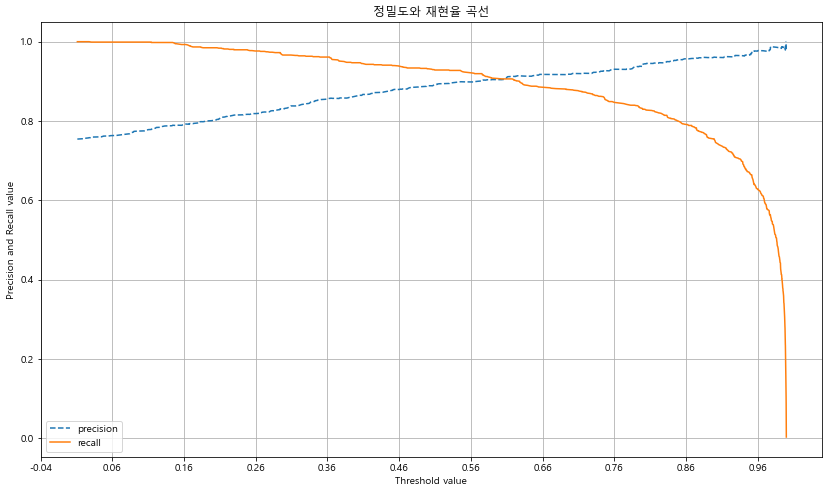

In [100]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [101]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = xgb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

### 오차행렬

In [102]:
confusion = confusion_matrix(y_test, xgb1_pred)
accuracy = accuracy_score(y_test, xgb1_pred)
precision = precision_score(y_test, xgb1_pred)
recall = recall_score(y_test, xgb1_pred)
f1 = f1_score(y_test, xgb1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[205 114]
 [ 67 913]]
정확도: 0.8607, 정밀도: 0.8890, 재현율: 0.9316, F1:0.9098, AUC:0.9066


In [103]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, xgb_clf1.predict_proba(X_test)[:, 1])

In [116]:
from sklearn.preprocessing import Binarizer

thresholds = [0.15, 0.25, 0.35, 0.45, 0.55]
pred_proba = xgb_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.15
오차행렬
[[ 59 260]
 [  6 974]]
정확도: 0.7952, 정밀도: 0.7893, 재현율: 0.9939, F1:0.8799, AUC:0.8451
임곗값: 0.25
오차행렬
[[104 215]
 [ 22 958]]
정확도: 0.8176, 정밀도: 0.8167, 재현율: 0.9776, F1:0.8899, AUC:0.8451
임곗값: 0.35
오차행렬
[[158 161]
 [ 38 942]]
정확도: 0.8468, 정밀도: 0.8540, 재현율: 0.9612, F1:0.9045, AUC:0.8451
임곗값: 0.45
오차행렬
[[190 129]
 [ 59 921]]
정확도: 0.8553, 정밀도: 0.8771, 재현율: 0.9398, F1:0.9074, AUC:0.8451
임곗값: 0.55
오차행렬
[[217 102]
 [ 75 905]]
정확도: 0.8637, 정밀도: 0.8987, 재현율: 0.9235, F1:0.9109, AUC:0.8451


### 최적 임곗값 적용

In [105]:
binarizer = Binarizer(threshold=0.55)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, xgb_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[217 102]
 [ 75 905]]
정확도: 0.8637, 정밀도: 0.8987, 재현율: 0.9235, F1:0.9109, AUC:0.9066


(0.8637413394919169,
 0.8987090367428004,
 0.923469387755102,
 0.910920986411676,
 0.9065958671870001)

### 피처중요도

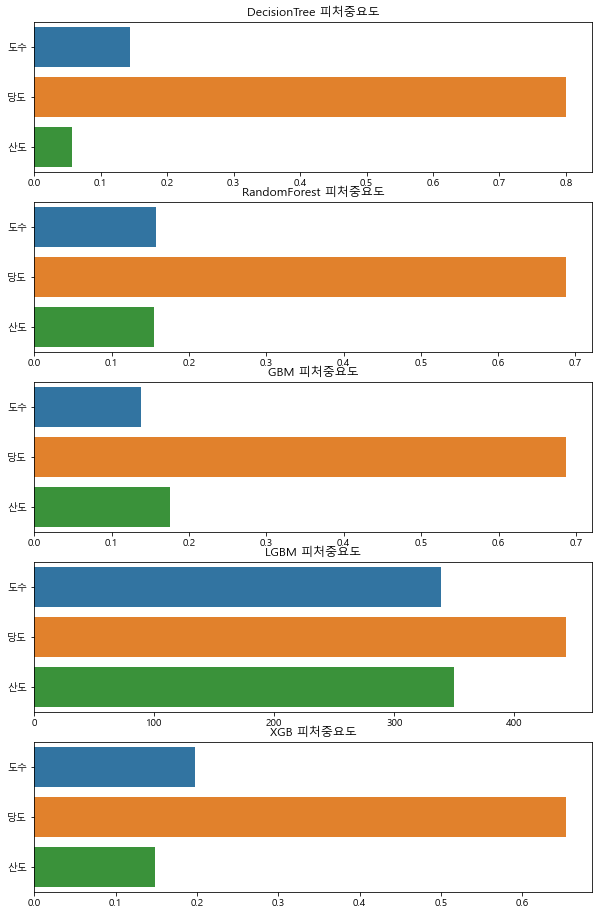

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(5, 1, squeeze=False)
fig.set_size_inches((10, 16))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf1.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=lgb_clf1.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("LGBM 피처중요도")

sns.barplot(x=xgb_clf1.feature_importances_, y=data.columns, ax=axes[4,0])
axes[4,0].title.set_text("XGB 피처중요도")

plt.show()

### 시각화

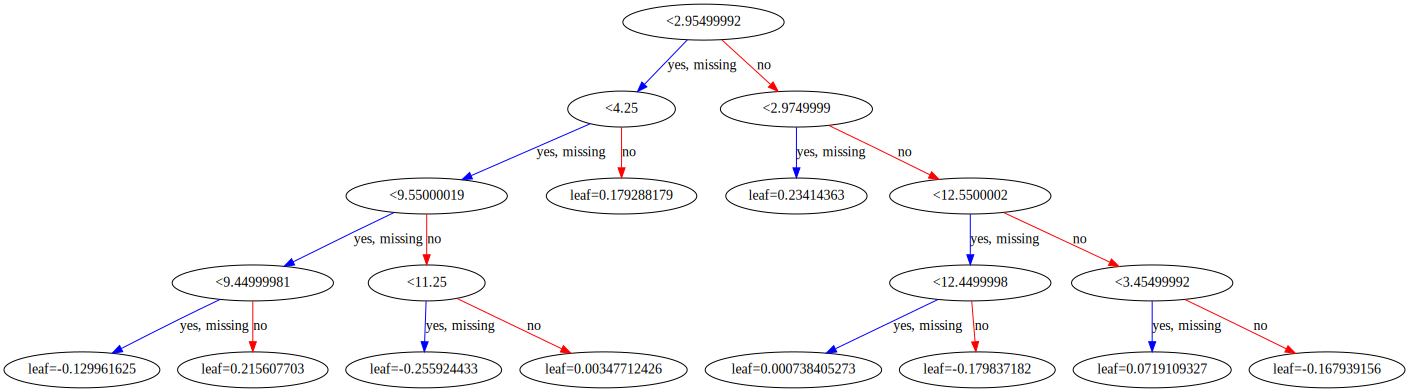

In [108]:
import xgboost as xgb
xgb.to_graphviz(xgb_clf1, num_trees=45)

### KNN GridSearchCV

In [127]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'n_neighbors':[5, 6, 7, 8],\
                'leaf_size':[4, 5, 6],\
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(knn_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 KNN 정확도 : {0:.4f}'.format(accuracy))
print('KNN GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'leaf_size': 4, 'n_neighbors': 5}

GridSearchCV 최고 정확도 : 0.8359
테스트 세트에서의 KNN 정확도 : 0.8368
KNN GridSearchCV 수행 시간: 5.6 초


In [128]:
# 최적 하이퍼 파라미터 적용
knn_clf1 = KNeighborsClassifier(leaf_size=4, n_neighbors=5)
knn_clf1.fit(X_train, y_train)
knn1_pred = knn_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, knn1_pred)))

최적화 후 예측 정확도: 0.8368


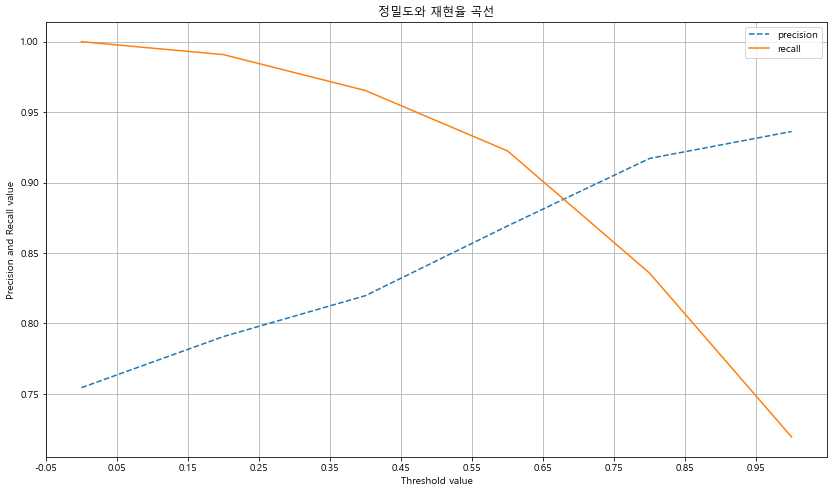

In [129]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, knn_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [130]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = knn_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1 2 3 4 5 6]
샘플 index로 추출한 임곗값:  [1.  0.8 0.6 0.4 0.2 0. ]
샘플 임곗값별 FPR:  [0.15  0.232 0.426 0.652 0.806 1.   ]
샘플 임곗값별 TPR:  [0.719 0.836 0.922 0.965 0.991 1.   ]


### 오차행렬

In [131]:
confusion = confusion_matrix(y_test, knn1_pred)
accuracy = accuracy_score(y_test, knn1_pred)
precision = precision_score(y_test, knn1_pred)
recall = recall_score(y_test, knn1_pred)
f1 = f1_score(y_test, knn1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[183 136]
 [ 76 904]]
정확도: 0.8368, 정밀도: 0.8692, 재현율: 0.9224, F1:0.8950, AUC:0.8451


In [132]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, knn_clf1.predict_proba(X_test)[:, 1])

In [133]:
from sklearn.preprocessing import Binarizer

thresholds = [0.25, 0.35, 0.45, 0.55, 0.65]
pred_proba = knn_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.25
오차행렬
[[111 208]
 [ 34 946]]
정확도: 0.8137, 정밀도: 0.8198, 재현율: 0.9653, F1:0.8866, AUC:0.8451
임곗값: 0.35
오차행렬
[[111 208]
 [ 34 946]]
정확도: 0.8137, 정밀도: 0.8198, 재현율: 0.9653, F1:0.8866, AUC:0.8451
임곗값: 0.45
오차행렬
[[183 136]
 [ 76 904]]
정확도: 0.8368, 정밀도: 0.8692, 재현율: 0.9224, F1:0.8950, AUC:0.8451
임곗값: 0.55
오차행렬
[[183 136]
 [ 76 904]]
정확도: 0.8368, 정밀도: 0.8692, 재현율: 0.9224, F1:0.8950, AUC:0.8451
임곗값: 0.65
오차행렬
[[245  74]
 [161 819]]
정확도: 0.8191, 정밀도: 0.9171, 재현율: 0.8357, F1:0.8745, AUC:0.8451


### 최적 임곗값 적용

In [134]:
binarizer = Binarizer(threshold=0.55)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, knn_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[183 136]
 [ 76 904]]
정확도: 0.8368, 정밀도: 0.8692, 재현율: 0.9224, F1:0.8950, AUC:0.8451


(0.8367975365665897,
 0.8692307692307693,
 0.9224489795918367,
 0.8950495049504951,
 0.8450914848698099)

### GNB GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

parameters = {
            'var_smoothing': np.logspace(0, -9, num=100)
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(gnb_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 GNB 정확도 : {0:.4f}'.format(accuracy))
print('GNB GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'var_smoothing': 3.511191734215127e-05}

GridSearchCV 최고 정확도 : 0.7613
테스트 세트에서의 GNB 정확도 : 0.8145
GNB GridSearchCV 수행 시간: 10.2 초


In [119]:
# 최적 하이퍼 파라미터 적용
gnb_clf1 = GaussianNB(var_smoothing=3.511191734215127e-05)
gnb_clf1.fit(X_train, y_train)
gnb1_pred = gnb_clf1.predict(X_test)
print('최적화 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, gnb1_pred)))

최적화 후 예측 정확도: 0.8145


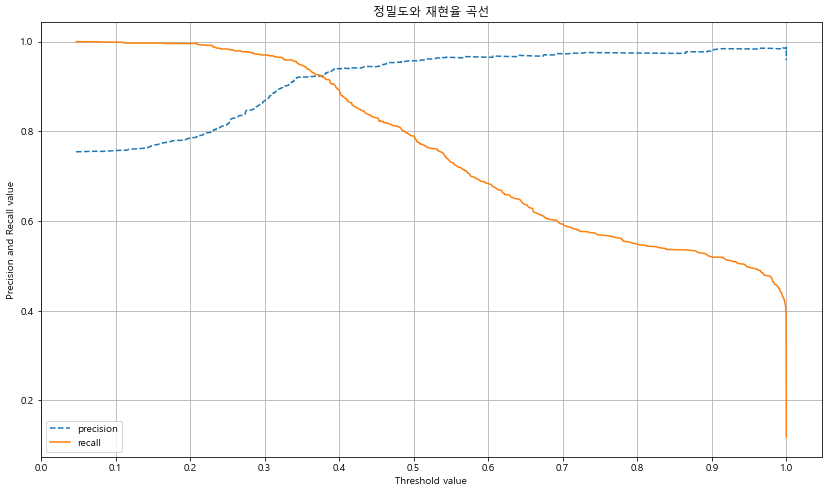

In [120]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, gnb_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

In [121]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gnb_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

### 오차행렬

In [122]:
confusion = confusion_matrix(y_test, gnb1_pred)
accuracy = accuracy_score(y_test, gnb1_pred)
precision = precision_score(y_test, gnb1_pred)
recall = recall_score(y_test, gnb1_pred)
f1 = f1_score(y_test, gnb1_pred)
roc_auc = roc_auc_score(y_test, pred_proba_class1)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[285  34]
 [207 773]]
정확도: 0.8145, 정밀도: 0.9579, 재현율: 0.7888, F1:0.8651, AUC:0.9188


In [123]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, gnb_clf1.predict_proba(X_test)[:, 1])

In [124]:
from sklearn.preprocessing import Binarizer

thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
pred_proba = gnb_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.1
오차행렬
[[  6 313]
 [  1 979]]
정확도: 0.7583, 정밀도: 0.7577, 재현율: 0.9990, F1:0.8618, AUC:0.9188
임곗값: 0.15
오차행렬
[[ 26 293]
 [  3 977]]
정확도: 0.7721, 정밀도: 0.7693, 재현율: 0.9969, F1:0.8684, AUC:0.9188
임곗값: 0.2
오차행렬
[[ 52 267]
 [  4 976]]
정확도: 0.7914, 정밀도: 0.7852, 재현율: 0.9959, F1:0.8781, AUC:0.9188
임곗값: 0.25
오차행렬
[[103 216]
 [ 16 964]]
정확도: 0.8214, 정밀도: 0.8169, 재현율: 0.9837, F1:0.8926, AUC:0.9188
임곗값: 0.3
오차행렬
[[175 144]
 [ 29 951]]
정확도: 0.8668, 정밀도: 0.8685, 재현율: 0.9704, F1:0.9166, AUC:0.9188
임곗값: 0.35
오차행렬
[[240  79]
 [ 52 928]]
정확도: 0.8992, 정밀도: 0.9215, 재현율: 0.9469, F1:0.9341, AUC:0.9188


### 최적 임곗값 적용

In [125]:
binarizer = Binarizer(threshold=0.3)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, gnb_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[175 144]
 [ 29 951]]
정확도: 0.8668, 정밀도: 0.8685, 재현율: 0.9704, F1:0.9166, AUC:0.9188


(0.8668206312548113,
 0.8684931506849315,
 0.9704081632653061,
 0.9166265060240963,
 0.918840765146184)

In [ ]:
start_tickers_2009 = datasets.get_top_k_tickers("20091230", 200)
start_stocks_df_2009 = datasets.get_stocks_by_market_and_date("20091230")
start_stocks_df_2009.filter(start_tickers_2009, axis=0).sort_values(by="시가총액", ascending=False)
df_fundamental_2009= stock.get_market_fundamental_by_ticker(date="20091230")
df_2009=pd.concat([start_stocks_df_2008, df_fundamental_2009], axis = 1, join='inner')
df_2009.sort_values('시가총액', ascending=False, inplace=True)
df_2009

In [ ]:
def df_fundamental(year):
    start_tickers_year = datasets.get_top_k_tickers(year+"1230", 200)
    start_stocks_df_year = datasets.get_stocks_by_market_and_date(year+"1230")
    start_stocks_df_year.filter(start_tickers_year, axis=0).sort_values(by="시가총액", ascending=False)
    df_fundamental_year= stock.get_market_fundamental_by_ticker(date=year+"1230")
    
    return df_fundamental_year

In [ ]:
def df_fundamental(year):
    start_tickers_year = datasets.get_top_k_tickers(year+"1230", 200)
    start_stocks_df_year = datasets.get_stocks_by_market_and_date(year+"1230")
    start_stocks_df_year.filter(start_tickers_year, axis=0).sort_values(by="시가총액", ascending=False)
    df_fundamental_year= stock.get_market_fundamental_by_ticker(date=year+"1230")
    df_year = pd.concat([start_stocks_df_year, df_fundamental_year], axis = 1, join='inner')
    df_year.sort_values('시가총액', ascending=False, inplace=True)
    
    return start_stocks_df_year, df_year

In [ ]:
start_stocks_df_2009, df_2009 = df_fundamental("2009")

In [144]:
def df_ticker(start_date, end_date, ticker_list):
    df_concat = pd.DataFrame()
    dfs_list = []
    for i in ticker_list:
        df_abc = stock.get_market_ohlcv_by_date(start_date, end_date, i)
        df_abc.rename(columns={'등락률':'일일수익률'},inplace=True)
        df_abc['티커'] = i
        df_abc['누적수익률'] =
        dfs_list.append(df_abc) 
        df_concat = pd.concat(dfs_list)
    return df_concat

In [ ]:
df_ticker("20100101", "20101230", "005250")

In [ ]:
for i in list:
    df_ticker("20100101", "20101230", i)
